# Basit Doğrusal Regresyon

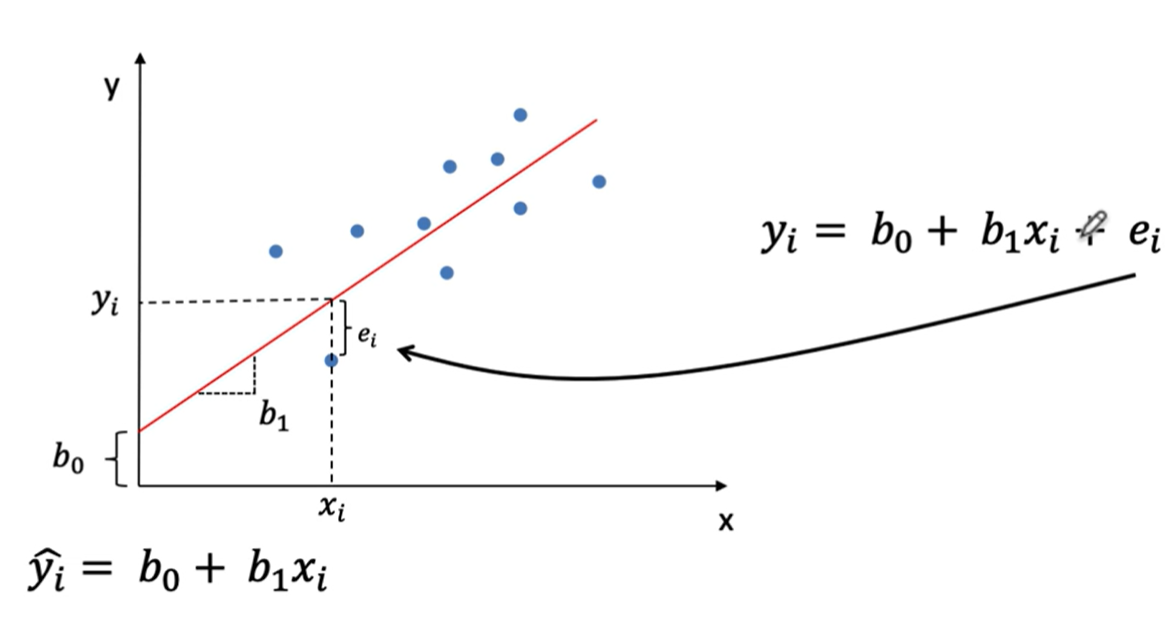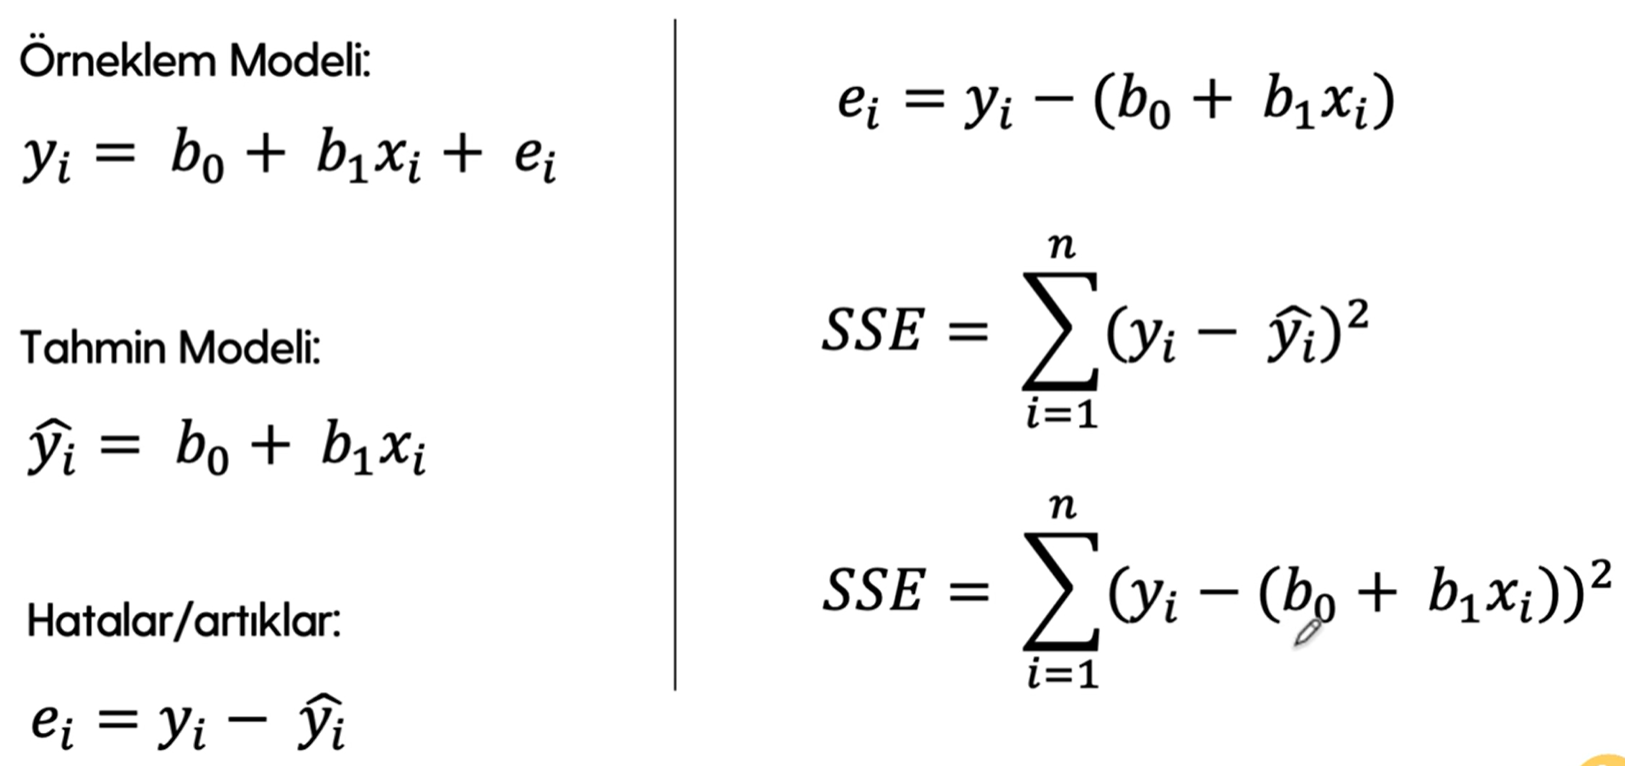

In [1]:
import pandas as pd

C:\Users\mehdi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.iloc[:,1:len(data)]

C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


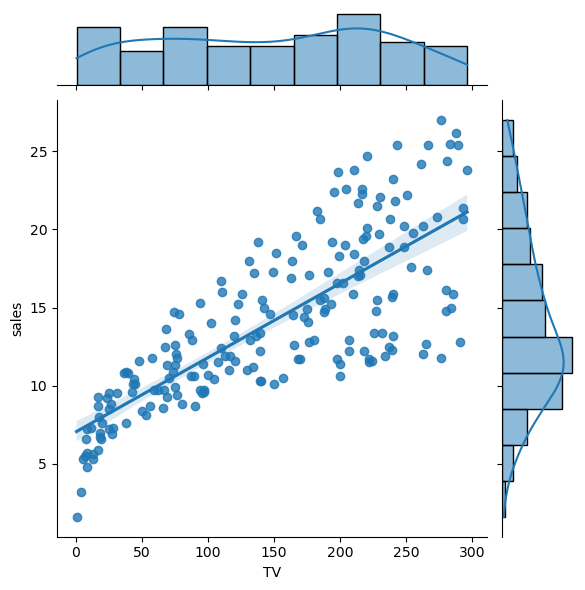

In [5]:
import seaborn as sns
sns.jointplot(x = "TV", y= "sales", data= data, kind="reg");

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x = data[["TV"]]

In [8]:
y = data[["sales"]]

In [9]:
reg = LinearRegression()

In [10]:
model = reg.fit(x,y)

In [11]:
model2 = LinearRegression().fit(data[["TV"]],data[["sales"]])

In [12]:
model2.coef_
model.intercept_

array([7.03259355])

In [13]:
model

LinearRegression()

In [14]:
str(model)

'LinearRegression()'

In [15]:
# b0
model.intercept_

array([7.03259355])

In [16]:
# b1
model.coef_

array([[0.04753664]])

In [17]:
# R kare
model.score(x,y)

0.611875050850071

(0.0, 28.27)

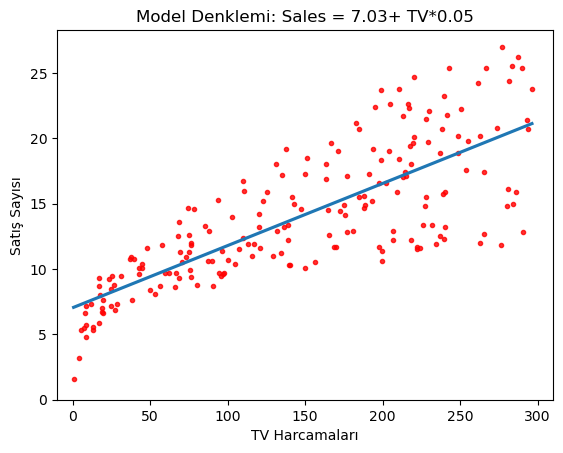

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x=data["TV"], y=data["sales"], ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("Model Denklemi: Sales = 7.03+ TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)


In [19]:
model.predict([[165]])

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [20]:
model.predict([[365]])

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.38346731]])

In [21]:
def ml(x):
    print("modelin b0:")
    print(x.intercept_)
    print("modelin b1:")
    print(x.coef_)

In [22]:
ml(model)

modelin b0:
[7.03259355]
modelin b1:
[[0.04753664]]


In [23]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])

In [24]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y],axis=1)
hatalar.columns= ["gercek_y","tahmin_edilen_y"]

In [25]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [26]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [27]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [28]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [29]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [30]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638104

In [31]:
np.sqrt(np.mean(hatalar["hata_kareler"]))

3.0480075999967755

# Çoklu Doğrusal Regresyon

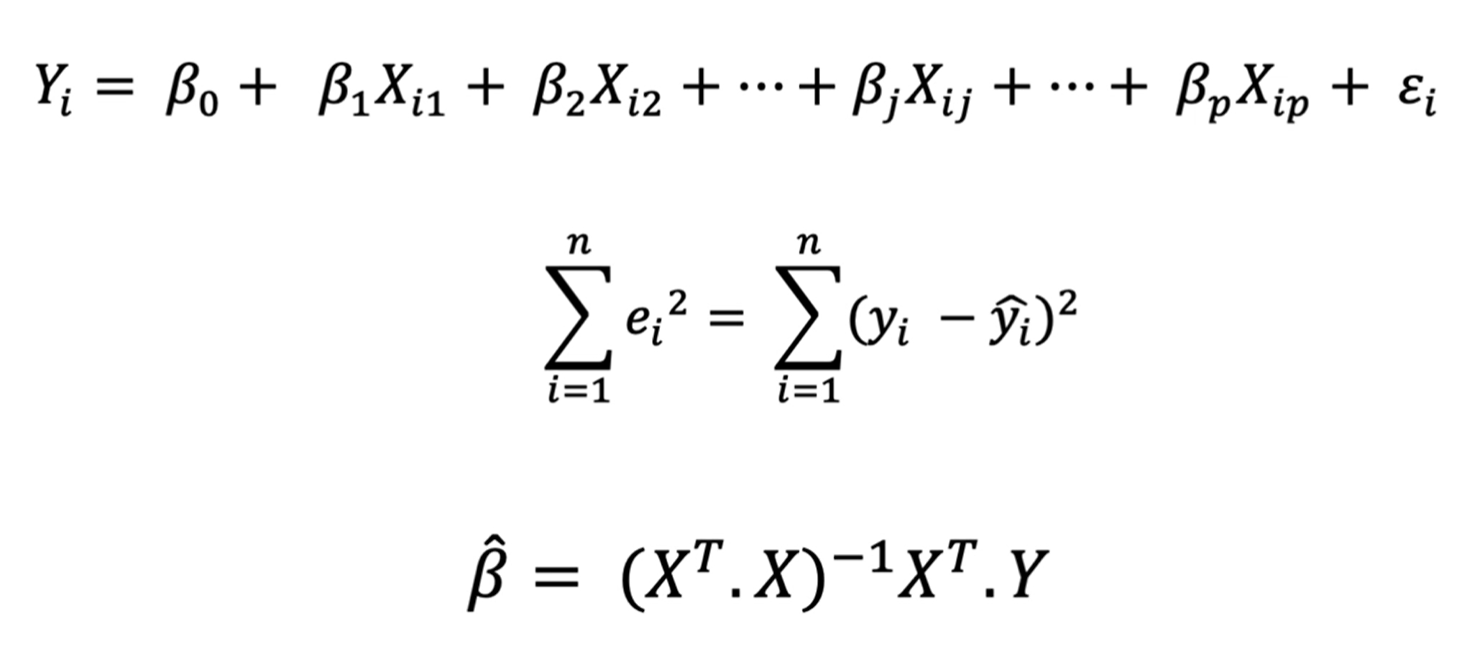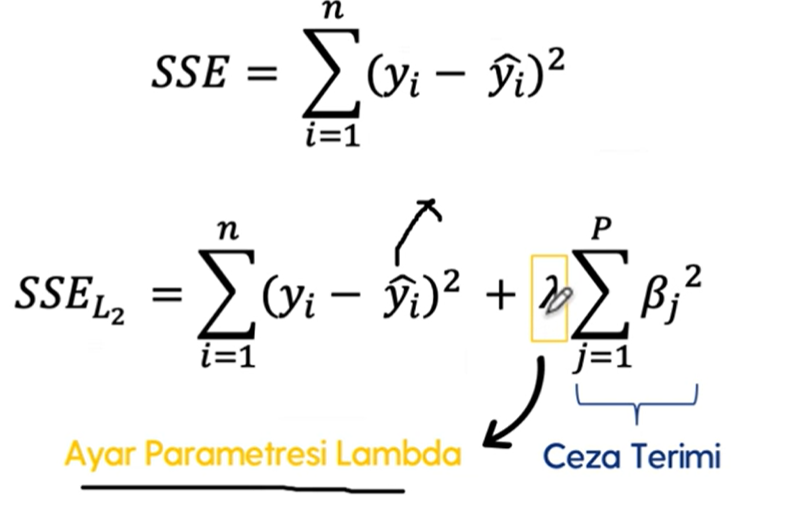

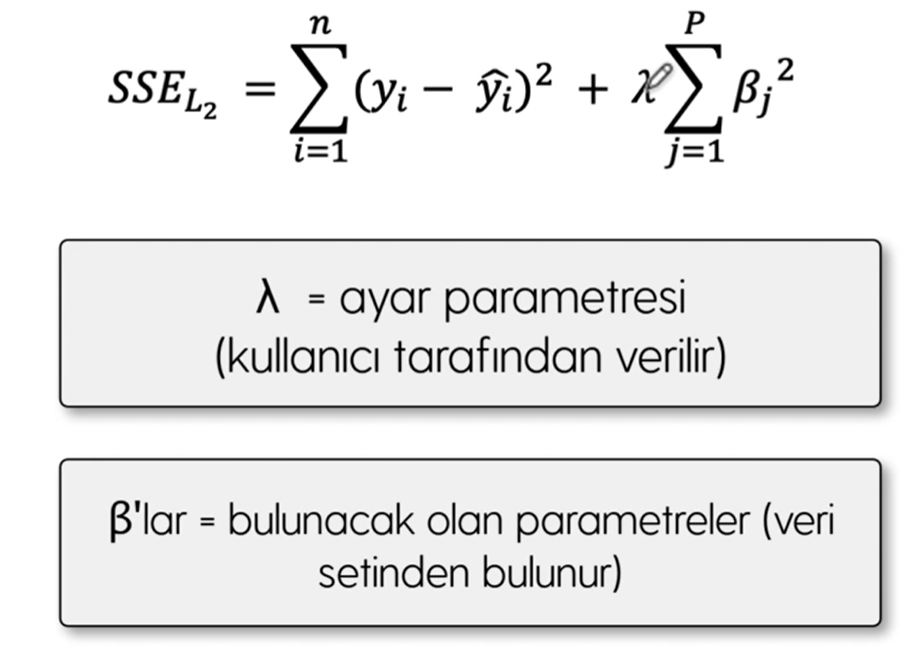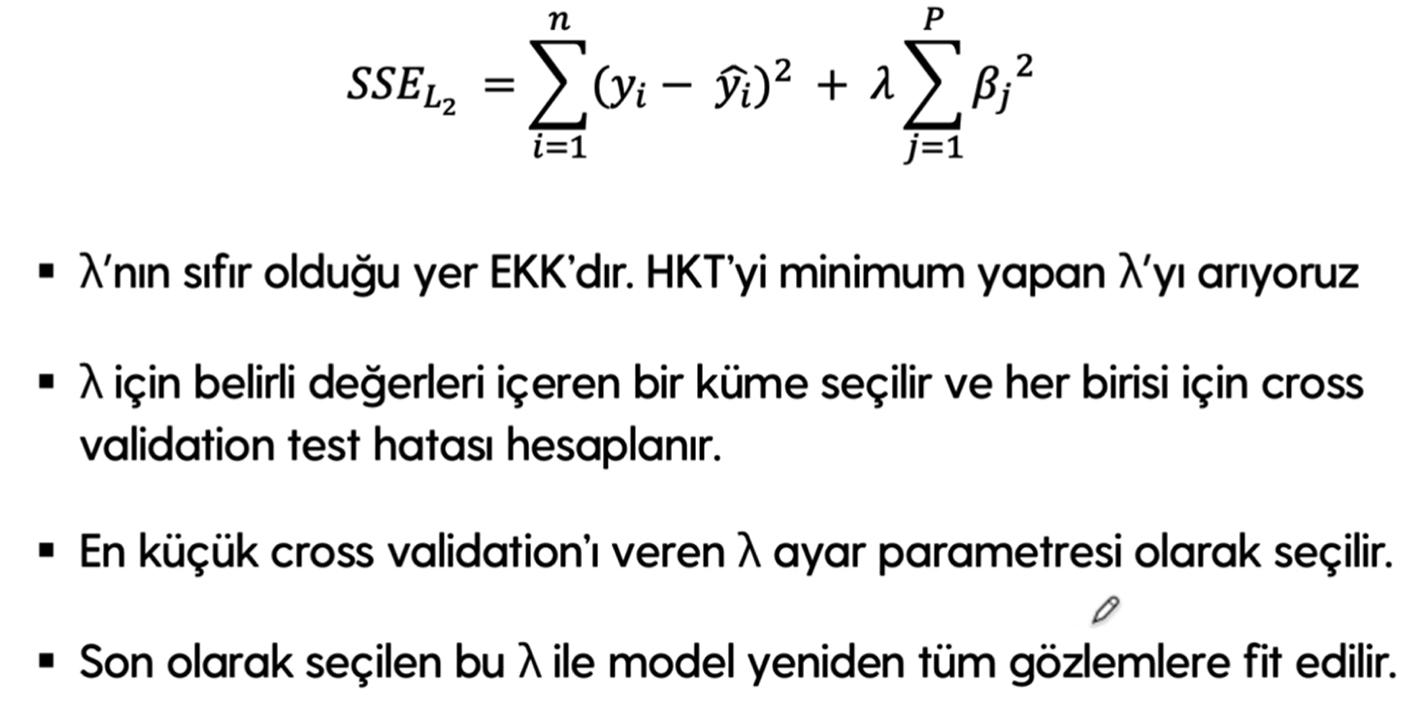

In [32]:
import pandas as pd
data2 = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Advertising.csv")

In [33]:
data2 = data2.iloc[:,1:len(data2)]
data2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
x= data2.drop("sales",axis=1)
y= data2[["sales"]]

In [35]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [38]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [39]:
#Statsmodels ile model kurma

In [40]:
import statsmodels.api as sm

In [41]:
modeld = sm.OLS(y,x).fit()

In [42]:
modeld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                   2.43e-171
Time:                        20:09:48   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm = sm.OLS(y,x)

In [44]:
model2 = lm.fit()

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                   2.43e-171
Time:                        20:09:51   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#scikit learn ile model kurmak

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression().fit(x,y)

In [49]:
model.intercept_

array([2.93888937])

In [50]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [51]:
yeni_veri= [[30],[10],[40]]

In [52]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T

In [53]:
yeni_veri

,0,1,2
0,30,10,40


In [54]:
model.predict(yeni_veri)

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.15562918]])

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
import numpy as np

In [57]:
MSE = mean_squared_error(y,model.predict(x)) #hata kareler ortalaması

In [58]:
RMSE =np.sqrt(MSE) #hata kareler ortalaması karakökü

In [59]:
MSE

2.784126314510936

In [60]:
RMSE

1.6685701407225697

In [61]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [62]:
model.intercept_

array([2.93888937])

In [63]:
#sınama seti
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state= 99)

In [65]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [66]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [67]:
x_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [68]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [69]:
model = LinearRegression().fit(x_train,y_train)

In [70]:
#eğitim hatası
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.7236824822650754

In [71]:
#test hatası
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.4312783138301641

In [72]:
#k-katlı cv
from sklearn.model_selection import cross_val_score

In [73]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,x_train,y_train, cv= 10 ,scoring= "neg_mean_squared_error")))

1.821271252239525

In [74]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,x,y, cv= 10 ,scoring= "neg_mean_squared_error")))

1.749276312684338

# Ridge Regresyon

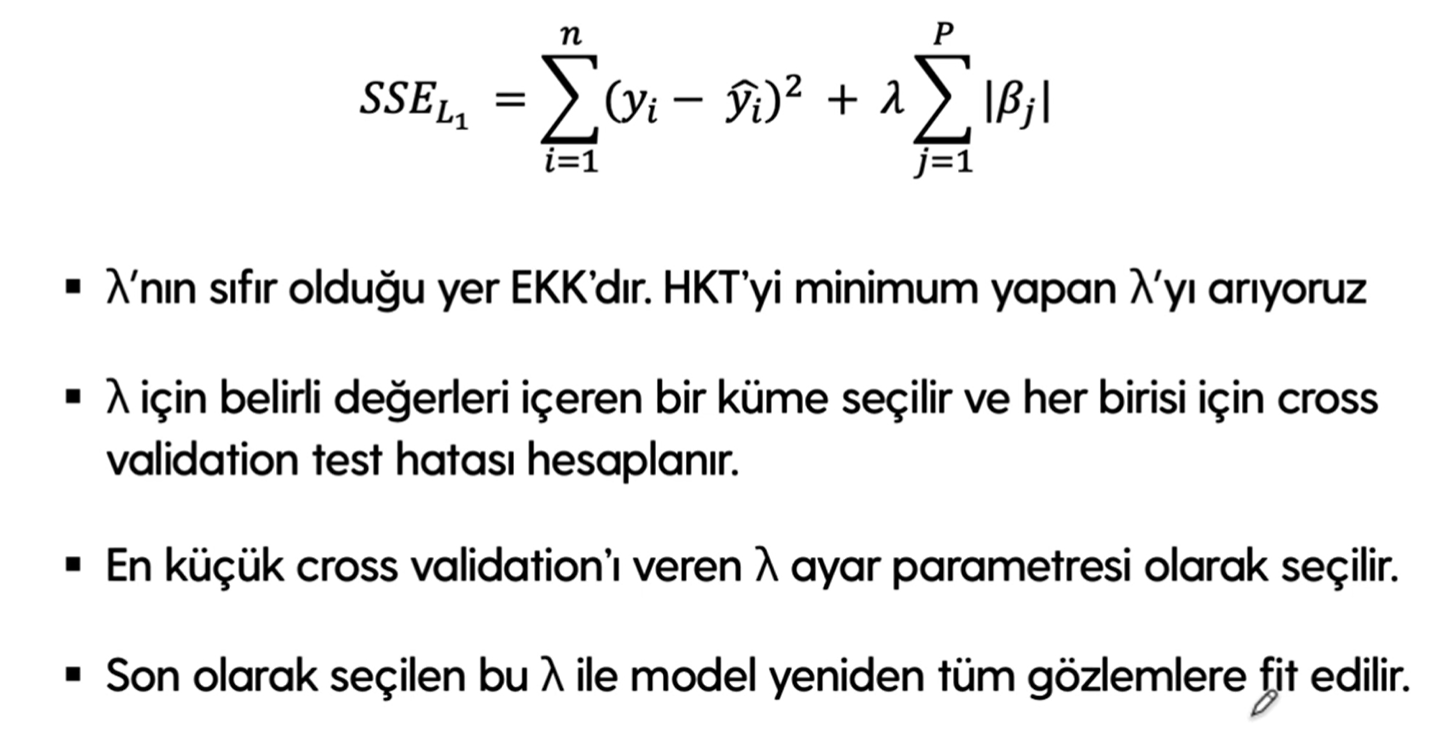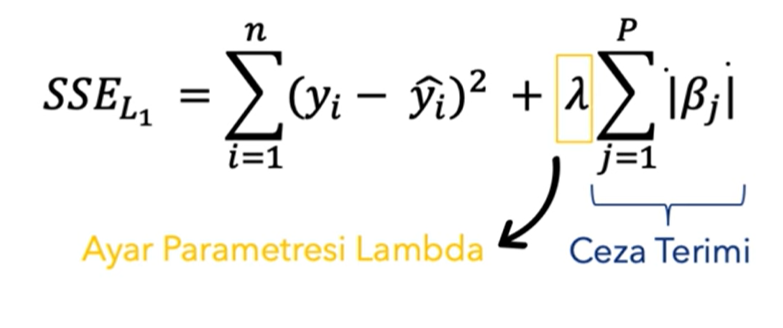

In [75]:
# bu alanda kullanılan kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [76]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")

In [77]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [78]:
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [79]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [80]:
data.shape

(263, 20)

In [81]:
ridge_model = Ridge(alpha=0.1).fit(x_train,y_train)

In [82]:
ridge_model

Ridge(alpha=0.1)

In [83]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [84]:
redige_model= Ridge().fit(x_train,y_train)

In [85]:
y_pred = ridge_model.predict(x_train)

In [86]:
y_pred[0:10]

array([ 377.32722972,  802.33593374,  495.66497455,  112.55723373,
        426.36377192, 1004.17111652,  154.60488574,  362.44112621,
        485.16325501,  918.52163204])

In [87]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [88]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.3294761170452

In [89]:
np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train, cv= 10 , scoring="neg_mean_squared_error")))

351.77357841284817

In [90]:
#test hatası
y_pred = ridge_model.predict(x_train)

In [94]:
# RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
# RMSE

In [95]:
ridge_model=Ridge(1000).fit(x_train,y_train)

In [96]:
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

358.56379142559547

In [97]:
lambdalar1= np.random.randint(0,1000,100)

In [98]:
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [99]:
from sklearn.linear_model import RidgeCV

In [100]:
# ridgecv =RidgeCV(alphas=lambdalar2,scoring="neg_squared_error",cv=10,normalize= True) RidgeCv fonksiyonun da normalize kalkmış

In [101]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# lambdalar2'nin tanımlı olduğundan ve doğru bir değer dizisi içerdiğinden emin olun
ridgecv = RidgeCV(alphas=lambdalar1, scoring="neg_mean_squared_error", cv=10)

# Veri normalleştirme ile bir pipeline oluşturun
pipeline = make_pipeline(StandardScaler(), ridgecv)

# Pipeline'ı kullanarak modelinizi eğitin
# X_train ve y_train, eğitim veri setinizin özellikleri ve hedef değişkeni olmalıdır
# pipeline.fit(X_train, y_train)


In [102]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([671, 716, 188, 859, 756, 868, 790, 334, 359, 921, 131, 955, 924,
       795, 885, 935, 878, 521, 261, 533, 768,  94, 450, 867, 207, 586,
       808, 782, 384, 966, 639, 431, 252, 482, 831, 682, 921, 518,  58,
        55,  71, 941, 123, 577, 165, 511, 796, 173, 516, 130, 626, 130,
        26, 246, 465, 968, 867, 295, 351, 553, 731, 966,  50, 854, 358,
       767, 746, 980, 109, 120,  45, 217, 210, 662, 377, 543, 404, 818,
       222, 426, 462, 588, 439, 319, 112, 424, 150, 216, 782,  25,  95,
       566, 581, 732, 729, 789, 787, 203, 351, 457]),
        cv=10, scoring='neg_mean_squared_error')

In [103]:
ridgecv.alpha_

25

In [104]:
ridge_tuned=Ridge(alpha= ridgecv.alpha_).fit(x_train,y_train)

In [105]:
y_pred = ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.5597039900417

# Lasso Regresyon

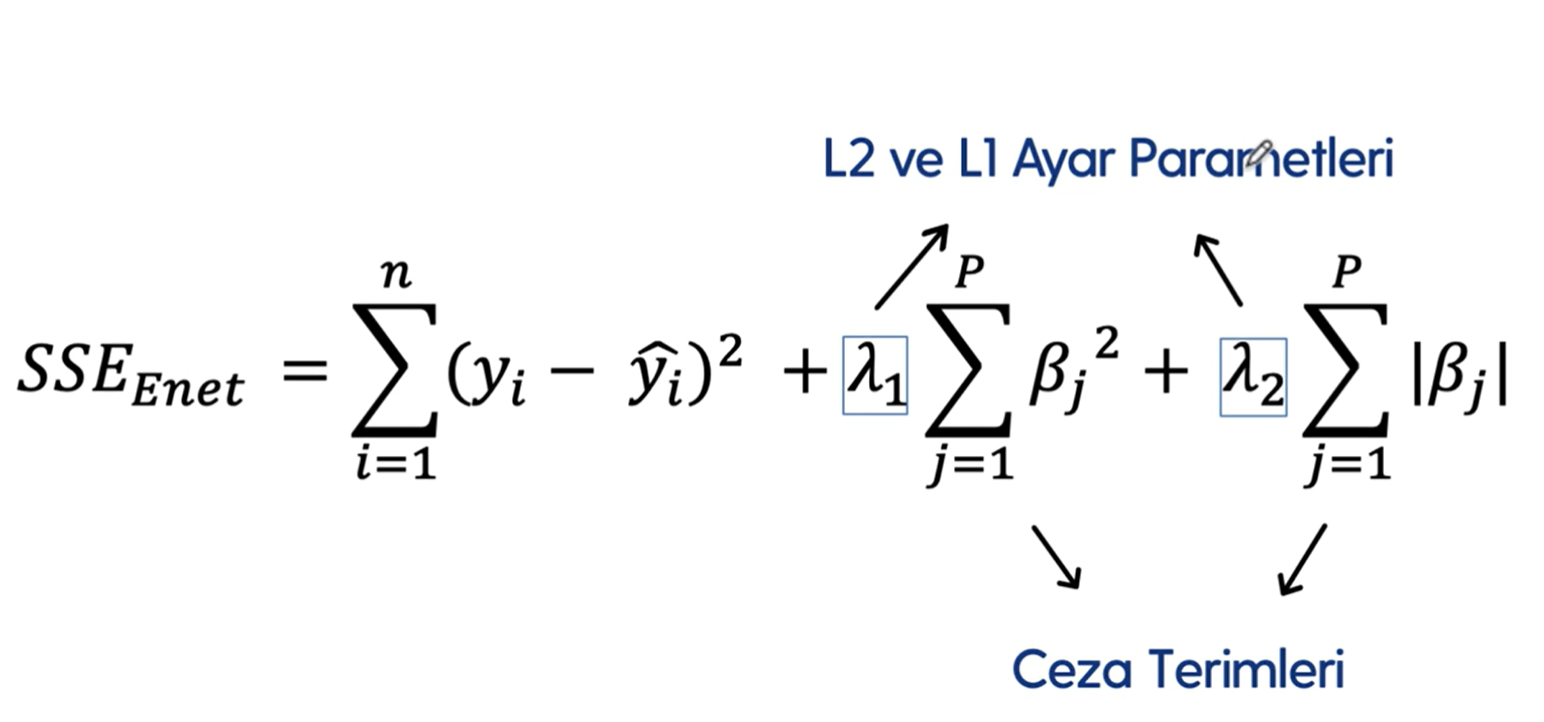

In [106]:
# bu alanda kullanılan kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [107]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [108]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [109]:
data.shape

(263, 20)

In [110]:
lasso_model=Lasso().fit(x_train,y_train)

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [111]:
lasso_model.intercept_

-5.5874506773361645

In [112]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [115]:
#farklı lambda degerlerine karsilik katsayilar
lasso= Lasso()
coefs= []
alphas = np.random.randint(0,100000,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)
    

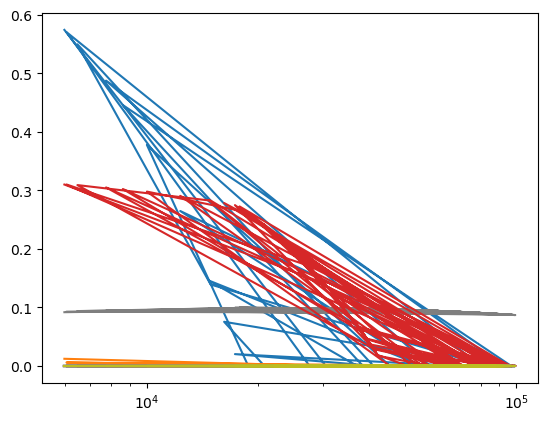

In [116]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [117]:
lasso_model.alpha

1.0

In [118]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [119]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [120]:
y_pred = lasso_model.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540347

In [123]:
r2_score(y_test,y_pred)

0.41422798132366134

In [124]:
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(x_train,y_train)

In [125]:
lasso_cv_model.alpha_

563.4670501833853

In [126]:
lasso_tuned= Lasso(alpha=lasso_cv_model.alpha_).fit(x_train,y_train)

In [127]:
y_pred = lasso_tuned.predict(x_test)

In [128]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069794

In [129]:
pd.Series(lasso_tuned.coef_,index=x_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon

In [130]:
# bu alanda kullanılan kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge , Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [131]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [132]:
enet_model= ElasticNet().fit(x_train,y_train)

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [133]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [134]:
enet_model.intercept_

-6.465955602111762

In [135]:
#tahmin
enet_model.predict(x_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [136]:
enet_model.predict(x_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [137]:
y_pred= enet_model.predict(x_test)

In [138]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.16765481812445

In [139]:
#R kare hesaplanması
r2_score(y_test,y_pred)

0.4107022246932692

In [140]:
enet_cv_model = ElasticNetCV(cv=10).fit(x_train,y_train)

In [141]:
enet_cv_model.alpha_

5230.764736479864

In [142]:
enet_cv_model.intercept_

-38.519405583943126

In [143]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [144]:
#final modeli
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(x_train,y_train)

In [145]:
y_pred= enet_tuned.predict(x_test)

In [146]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [147]:
?ElasticNet